# 기말고사 대체과제

`final_scores.csv`는 한 학교 학생중 50명의 최종성적과 공부시간, 출석률, SNS사용시간, 캡스톤점수의 데이터를 수집한 데이터이다.

* 해석 등의 텍스트를 서술할 때는 마크다운 셀을 이용합니다.
* 코드셀이나 마크다운 셀은 필요한만큼 추가하셔도 좋습니다.
* 제출은 `기말고사_{본인이름}.ipynb`이름으로 제출합니다.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf

# 한글 폰트 설정 (Windows)
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

df = pd.read_csv('final_scores.csv')
df.head()

,공부시간,출석률,SNS사용시간,캡스톤점수,최종성적
0,4.22,0.870,1.57,76.9,75.9
1,5.49,0.915,2.07,77.0,86.7
2,6.96,0.826,3.07,84.9,82.1
3,6.94,0.849,2.37,87.3,81.1
4,3.74,0.829,4.41,69.9,68.6


## 1. 신뢰구간 추정 [10점]

`최종성적` 데이터의 모평균의 95% 신뢰구간을 구하세요.
* 표본분산을 구합니다.
* 모분산은 모른다고 가정하고 95% 신뢰구간을 구합니다.
* 결과를 해석합니다.

In [9]:
scores = df["최종성적"]

In [10]:
n = len(scores)
sample_mean = scores.mean()
sample_var = scores.var(ddof=1)   # ddof=1 이면 표본분산
sample_mean, sample_var

(np.float64(79.42200000000001), np.float64(68.47440408163267))

In [11]:
rv = stats.t(n-1)
lcl = sample_mean - rv.isf(0.025) * np.sqrt(sample_var/n)
ucl = sample_mean - rv.isf(0.975) * np.sqrt(sample_var/n)
lcl, ucl

(np.float64(77.07029198649535), np.float64(81.77370801350467))

### 결과 해석
위에서 구한 95% 신뢰구간 `(77.070, 81.773)` 사이에 모평균이 포함될 확률이 95%라고 추정할 수 있음.

## 2. 가설검정 [10점]
다음 상황에서 통계적 가설검정을 수행하세요. (유의수준 α = 0.05)
* 모분산이 64라고 알려져 있다고 가정합니다.
* '최종성적 모평균이 75점이다'라는 가설을 검정합니다.
* `귀무가설` `대립가설`을 설정합니다.
* 유의수준 5%의 양측 검정을 시행합니다.
* 귀무가설을 채택/기각 합니다.
* 결과를 해석합니다.

In [12]:
# 귀무가설 : 모평균이 75점이다.
# 대립가설 : 모평균이 75점이 아니다.
gui_mu = 75
p_var = 64
n = len(scores)
s_mean = scores.mean()
s_mean

np.float64(79.42200000000001)

In [13]:
rv = stats.norm()
lcl = sample_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = sample_mean - rv.isf(0.975) * np.sqrt(p_var/n)
lcl, ucl

(np.float64(77.20455388104052), np.float64(81.6394461189595))

In [14]:
if lcl <= gui_mu <= ucl:
    print("귀무가설 채택: 모평균은 75점이라고 할 수 있다.")
else:
    print("귀무가설 기각: 모평균은 75점이라고 할 수 없다.")

귀무가설 기각: 모평균은 75점이라고 할 수 없다.


### 결과 해석
검정 결과 95% 신뢰구간 `(77.204, 81.639)`에 귀무가설의 모평균 75점이 포함되지 않으므로, 유의수준 5%에서 **귀무가설을 기각**함.\n

따라서 **모평균은 75점이라고 할 수 없음.**

## 3. 상관분석 [10점]
`공부시간`, `출석률`, `SNS사용시간`, `캡스톤점수`, `최종성적` 다섯 변수의 상관관계를 분석하세요.
* 변수들의 상관계수 행렬을 구합니다.
* `최종성적`변수와 나머지 변수의 관계가 어떤 관계를 보이는지 산점도로 시각화 하세요.
* `최종성적`변수와 나머지 변수가 어떤 상관관계를 보이는지 간단히 해석하세요.

In [15]:
df.corr()

,공부시간,출석률,SNS사용시간,캡스톤점수,최종성적
공부시간,1.000000,0.553157,-0.735128,0.841072,0.774627
출석률,0.553157,1.000000,-0.371226,0.509123,0.437992
SNS사용시간,-0.735128,-0.371226,1.000000,-0.647690,-0.781501
캡스톤점수,0.841072,0.509123,-0.647690,1.000000,0.726798
최종성적,0.774627,0.437992,-0.781501,0.726798,1.000000


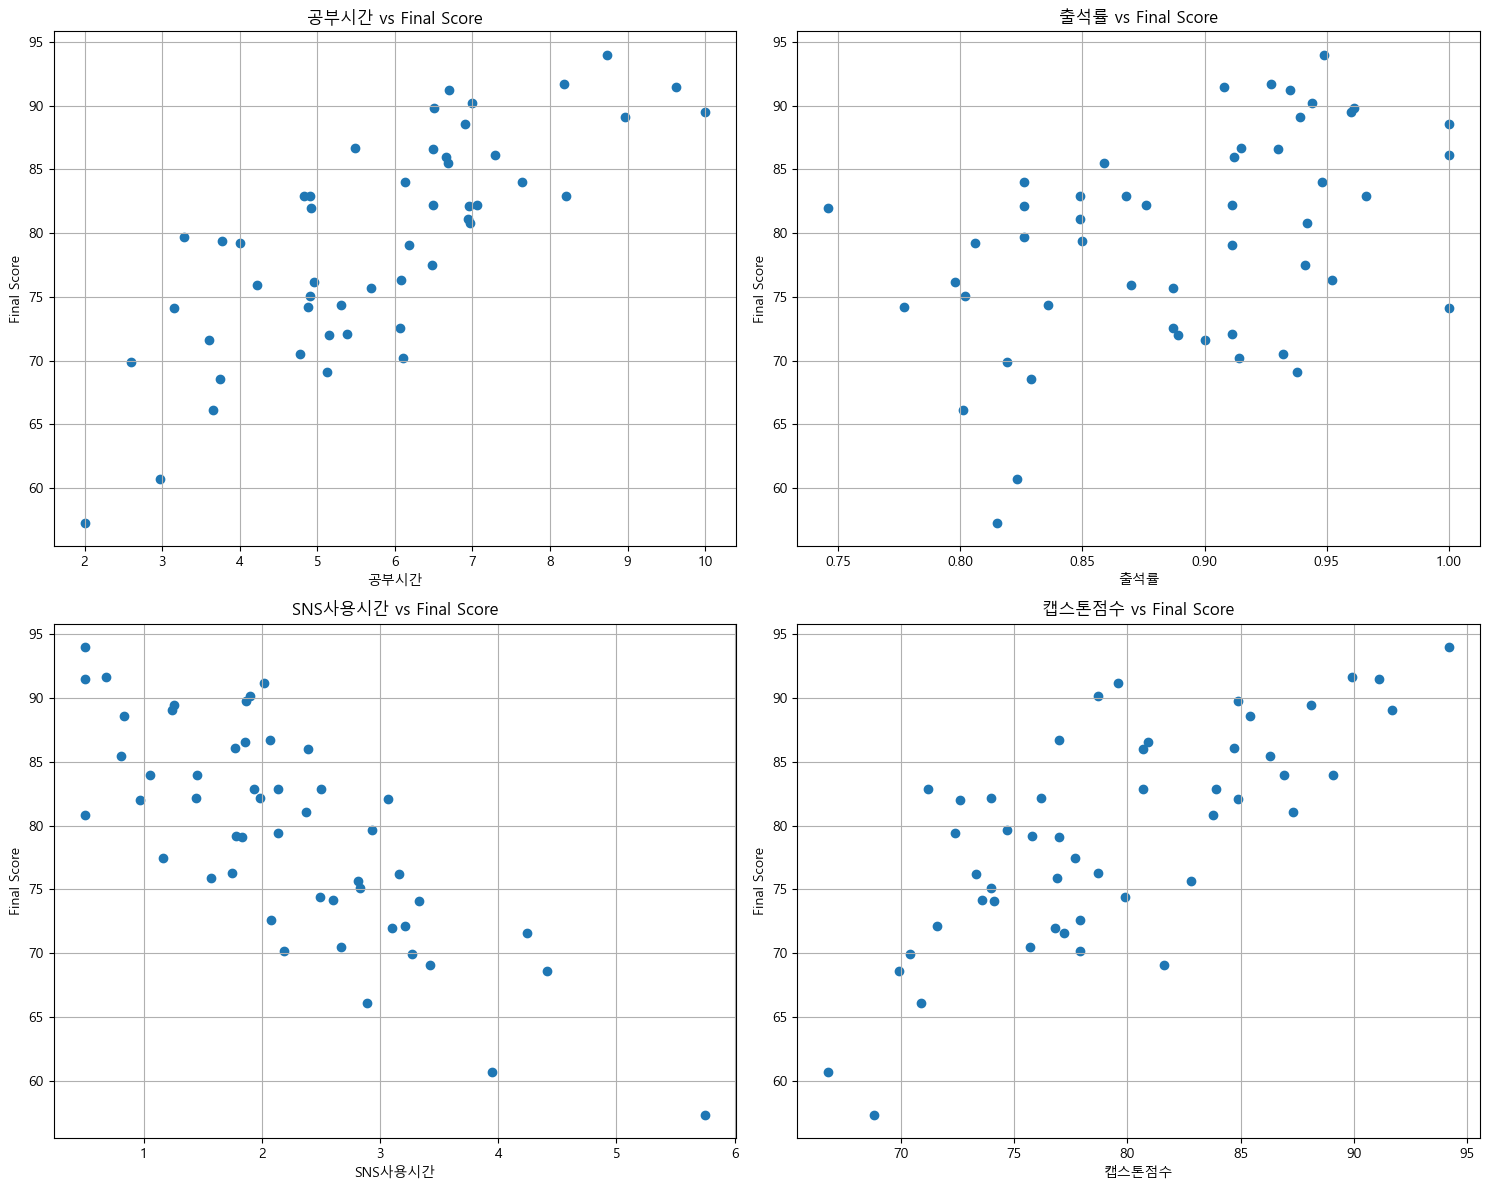

In [16]:
# 산점도 시각화
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
variables = ['공부시간', '출석률', 'SNS사용시간', '캡스톤점수']

# 한번에 그리기
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    axs[row, col].scatter(df[var], df['최종성적'])
    axs[row, col].set_xlabel(var)
    axs[row, col].set_ylabel('Final Score')
    axs[row, col].set_title(f'{var} vs Final Score')
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

### 상관분석 해석
* **공부시간**: 최종성적과 강한 양의 상관관계를 보임.
* **출석률**: 최종성적과 양의 상관관계를 보임.
* **SNS사용시간**: 최종성적과 강한 음의 상관관계를 보임.
* **캡스톤점수**: 최종성적과 강한 양의 상관관계를 보임.

## 4. 회귀분석 [10점]
* 반응변수: `최종성적`
* 설명변수: `공부시간`, `출석률`, `SNS사용시간`, `캡스톤점수`
* 설명변수로 반응변수를 예측하는 회귀모형을 만듭니다.
* 만든 회귀 모형을 비교하여 가장 적절하다고 생각하는 모형을 선택합니다.
* 선택 이유를 서술하세요. (상관계수, summary의 지표 등을 근거로 언급할 것)

### 4.1. 전체 변수를 사용한 회귀모델 (Full Model) 분석 설명

아래 코드는 `statsmodels` 라이브러리의 `ols` (Ordinary Least Squares, 최소자승법) 함수를 사용하여 선형 회귀 모델을 제작함.

* **`formula`**: `'반응변수 ~ 설명변수1 + 설명변수2 + ...'` 형태로 식을 정의
  - 여기서 `최종성적`이 우리가 예측하고자 하는 값(반응변수)
  - `공부시간`, `출석률`, `SNS사용시간`, `캡스톤점수`가 예측에 사용되는 값(설명변수)
* **`.fit()`**: 정의된 식과 데이터를 바탕으로 모델을 학습시킴.
* **`.summary()`**: 모델의 학습 결과를 표로 요약해서 보여줌.
  - **R-squared (결정계수)**: 모델이 데이터를 얼마나 잘 설명하는지 나타냄. (1에 가까울수록 설명력이 높음)
  - **P>|t| (P-value)**: 각 변수가 통계적으로 유의미한지 나타냄. 보통 **0.05보다 작으면 유의미**하다고 판단하고, 반대로 0.05보다 크면 해당 변수가 종속변수에 영향을 주지 않을 가능성이 높다는 뜻이므로 제거를 고려해야 함.

In [17]:
print("=== Model 1: Full Model ===")
# smf.ols: 최소자승법(OLS)으로 선형회귀모형 생성. 식: 최종성적 ~ 나머지 4개 변수
model1 = smf.ols(formula='최종성적 ~ 공부시간 + 출석률 + SNS사용시간 + 캡스톤점수', data=df).fit()

# .summary(): 회귀분석 결과표 출력 (Coef: 계수, P>|t|: 유의확률 확인)
print(model1.summary())

=== Model 1: Full Model ===
                            OLS Regression Results                            
Dep. Variable:                   최종성적   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     27.73
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           1.23e-11
Time:                        15:36:08   Log-Likelihood:                -145.04
No. Observations:                  50   AIC:                             300.1
Df Residuals:                      45   BIC:                             309.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.6771   

### 4.2. 변수 선택 및 축소 모델 (Reduced Model) 분석 설명

위의 Full Model 결과(summary)의 `P>|t|` 항목을 살펴봤을 때, 특정 변수의 P-value가 0.05보다 훨씬 크다면(예: `출석률`의 경우 0.810으로 매우 높음), 통계적으로 유의하지 않다고 볼 수 있음.
따라서 유의하지 않은 변수를 제거하고, 중요한 변수들만 남겨서 다시 모델을 만드는데, 이를 **축소 모델 (Reduced Model)**이라고 함.

* 아래 코드는 `출석률`을 제외하고 모델을 다시 학습시킨 것

In [18]:
print("\n=== Model 2: Reduced Model ===")
model2 = smf.ols(formula='최종성적 ~ 공부시간 + SNS사용시간 + 캡스톤점수', data=df).fit()

# 결과 출력 확인
print(model2.summary())


=== Model 2: Reduced Model ===
                            OLS Regression Results                            
Dep. Variable:                   최종성적   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     37.72
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           1.87e-12
Time:                        15:36:08   Log-Likelihood:                -145.07
No. Observations:                  50   AIC:                             298.1
Df Residuals:                      46   BIC:                             305.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.729

* 아래 코드는 `출석률`, `캡스톤점수`를 제외하고 모델을 다시 학습시킨 것

In [19]:
print("\n=== Model 3: Reduced Model ===")
model3 = smf.ols(formula='최종성적 ~ 공부시간 + SNS사용시간', data=df).fit()

# 결과 출력 확인
print(model3.summary())


=== Model 3: Reduced Model ===
                            OLS Regression Results                            
Dep. Variable:                   최종성적   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     54.29
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           6.08e-13
Time:                        15:36:08   Log-Likelihood:                -146.18
No. Observations:                  50   AIC:                             298.4
Df Residuals:                      47   BIC:                             304.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.550

### 4.3. 모형 비교 (AIC)

3개 모델 중 어느 것이 더 좋은지 판단하기 위해 **AIC (Akaike Information Criterion)** 값을 비교함.

* **AIC**: 모형의 적합도(얼마나 잘 맞추는지)와 간명성(변수가 너무 많지 않은지)을 동시에 고려한 지표
* **해석**: **AIC 값이 작을수록 더 좋은 모델** (즉, 정보 손실이 적은 모델)
* 만약 Reduced Model의 AIC가 Full Model보다 작다면, 불필요한 변수를 제거한 것이 더 효율적이라는 뜻임.

In [20]:
# AIC 비교: 값이 작을수록 더 좋은 모델
print(f"Model 1 AIC: {model1.aic:.4f}")
print(f"Model 2 AIC: {model2.aic:.4f}")
print(f"Model 3 AIC: {model3.aic:.4f}")

Model 1 AIC: 300.0771
Model 2 AIC: 298.1422
Model 3 AIC: 298.3591


### 모형 선택 결과
* **Model 1 (Full Model)**: AIC = 300.077, Adj. R-squared = 0.686
* **Model 2 (Reduced Model)**: AIC = 298.142, Adj. R-squared = 0.692
* **Model 3 (Reduced Model)**: AIC = 298.359, Adj. R-squared = 0.685

**결론**: 3개 모델 중 **AIC 값이 가장 낮고**, **Adjusted R-squared 값이 가장 높은** Model 2가 더 적합한 모형이라고 판단됨.
또한 `출석률` 변수는 Model 1에서 유의하지 않게 나타났고(P-value 0.810), `캡스톤점수` 변수는 Model 2에서 P-value가 0.15로 0.05보다 높게 나왔고, 3개 설명변수 중 가장 P-value가 가장 높아서 이를 제외하고 Model 3를 만들어 보았지만 오히려 AIC 값이 증가하고 Adj. R-squared 값은 낮아져서 더 적합하지 않은 모형이 되어버림.

그래서 Model 2가 예측력과 설명력 면에서 가장 우수함.